In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

## Phasor
sine wave와 같은 곡선(sinusoid)을 만드는 것

In [2]:
# analog(continuous) ㄴㄴ, digital(discrete)
# parameter setting
amp = 1          # range [-1.0, 1.0]
sr = 10000       # sampling rate, Hz, 가청주파수: 20000Hz --> sr : 40000Hz
dur = 0.5        # in seconds
freq = 150.0     # sine frequency, Hz

sr과 freq 둘 다 Hz를 쓰지만, 다른 개념이다(1초에 몇 번 하는지)

hz --> 1초를 몇 번 나누는지

sr --> 1초에 몇 번 반복되는지

In [3]:
# generate time(시간축 만들기)
# 0.0001초~0.5초까지 만든 것
# np.arange --> 미만이어서 +1
t = np.arange(1, sr*dur + 1)/sr
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [4]:
len(t)

5000

In [5]:
t.shape

(5000,)

### 모든 소리 : sin wave의 합(amp, frq를 다양하게 해서)

In [6]:
# generate phase
# np.sin은 각도(degree)가 아닌, 호도법(radian)으로 input을 받는다.
# 그러므로 radian으로 바꿔준다.
# 1초에 freq번 도는 각(radian)으로 변환
theta = t * 2*np.pi * freq
theta

array([9.42477796e-02, 1.88495559e-01, 2.82743339e-01, ...,
       4.71050402e+02, 4.71144650e+02, 4.71238898e+02])

In [7]:
# generate signal by cosine-phasor
# sin은 각을 input으로 받음 --> radian으로 변환해준 theta를 넣어줌
# 당연히 이 sin값도 freq번만큼 반복할 것이다.
s = amp * np.sin(theta)

In [8]:
s

array([ 9.41083133e-02,  1.87381315e-01,  2.78991106e-01, ...,
       -1.87381315e-01, -9.41083133e-02, -2.54751293e-14])

In [9]:
np.sin(0)

0.0

In [10]:
np.cos(np.pi)

-1.0

In [11]:
# float여서 그런 듯
np.sin(np.pi)

1.2246467991473532e-16

Text(0, 0.5, 'real')

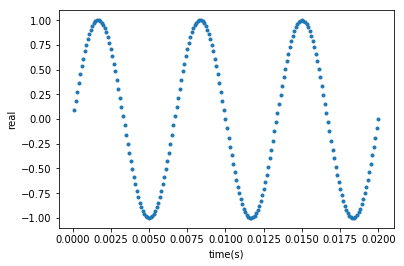

In [12]:
# plotting을 할 때는 theta가 아닌 s
# 왜냐하면 theta: 각 --> 반복X
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:200], s[0:200], '.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')

In [13]:
# 직접 play해보긔~
ipd.Audio(s, rate=sr)

Text(0, 0.5, 'real')

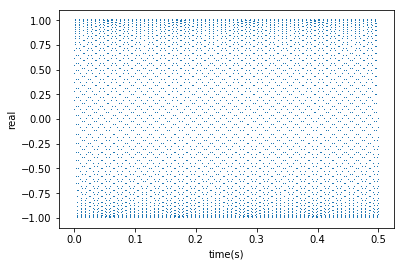

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s, ',')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')

In [15]:
# generate signal by complex-phasor
# exp(theta * 1j) = cos(theta) + sin(theta)*j
# sin 함수 대신에 exp로 phasor 생성
c = amp * np.exp(theta*1j)

In [16]:
c[:10]

array([0.99556196+0.09410831j, 0.98228725+0.18738131j,
       0.96029369+0.27899111j, 0.92977649+0.36812455j,
       0.89100652+0.4539905j , 0.84432793+0.53582679j,
       0.79015501+0.61290705j, 0.72896863+0.68454711j,
       0.66131187+0.75011107j, 0.58778525+0.80901699j])

In [17]:
c.real[:10]

array([0.99556196, 0.98228725, 0.96029369, 0.92977649, 0.89100652,
       0.84432793, 0.79015501, 0.72896863, 0.66131187, 0.58778525])

In [18]:
c.imag[:10]

array([0.09410831, 0.18738131, 0.27899111, 0.36812455, 0.4539905 ,
       0.53582679, 0.61290705, 0.68454711, 0.75011107, 0.80901699])

Text(0.5, 0, 'imag')

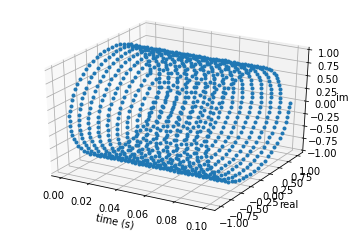

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

Text(0, 0.5, 'real')

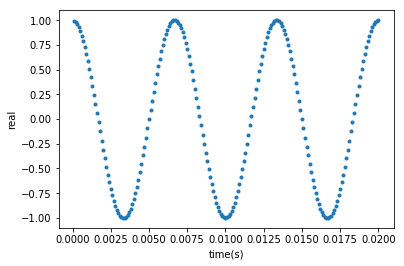

In [20]:
# c = a + bi
# a = cos(theta), b = sin(theta)
# c의 real --> cos
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:200], c.real[0:200], '.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')

Text(0, 0.5, 'imag')

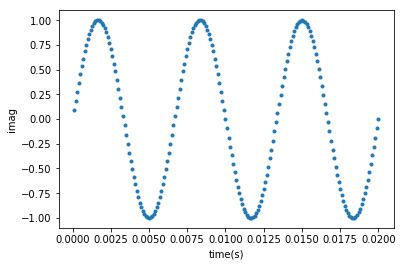

In [21]:
# c의 imag --> sin
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:200], c.imag[0:200], '.')
ax.set_xlabel('time(s)')
ax.set_ylabel('imag')

## Generating pulse train
Time series: sum of sin waves!

sound와 유사하게 다른 time series data(주식, 기온 변화) --> sound로 playable

In [22]:
# Pulse train: 성대에서 나는 소리를 만들어본 것, buzz라고 하기도!
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    # F0(pitch)의 배수가 되는 freq를 가진 sin waves 다 더해줌(srate가 허용하는 한도까지)
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s += tmp

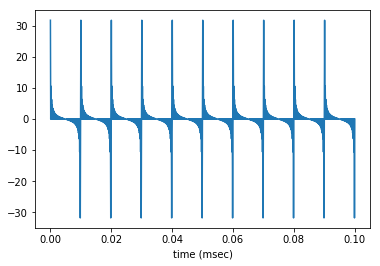

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

In [24]:
# 내가 원하는 배수까지만 더해보기
def freqs(F0, n):
    Fs = range(F0, F0*n+1, F0)
    s = np.zeros(len(t))
    for freq in Fs:
        theta = t * 2*np.pi * freq
        tmp = amp * np.sin(theta)
        s += tmp
    return s

def plot_signal(time,signal, samples):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(time[0:samples], signal[0:samples]); 
    ax.set_xlabel('time (msec)')

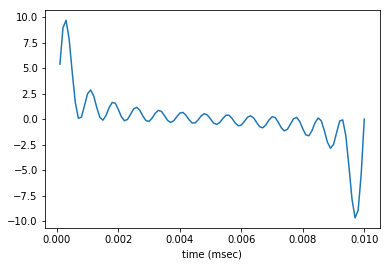

In [25]:
s = freqs(100, 13)
plot_signal(t,s,100)

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


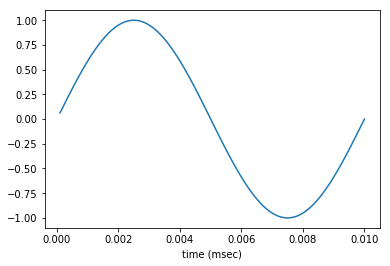

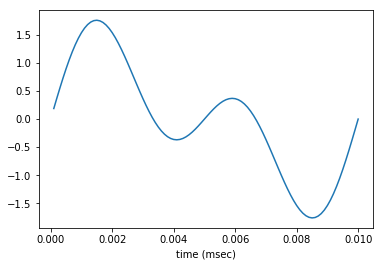

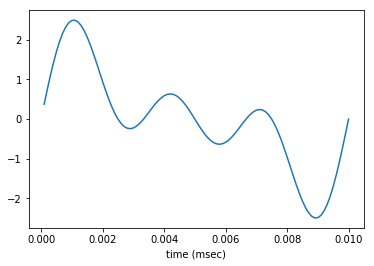

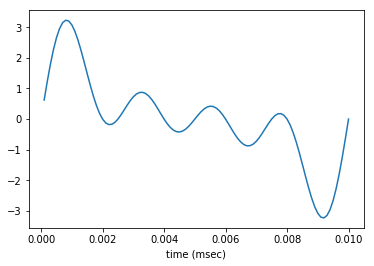

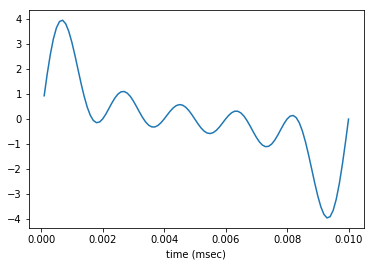

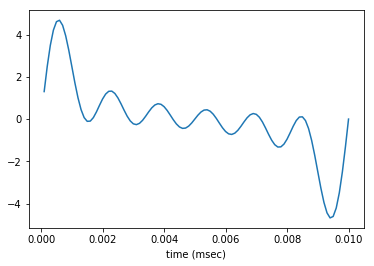

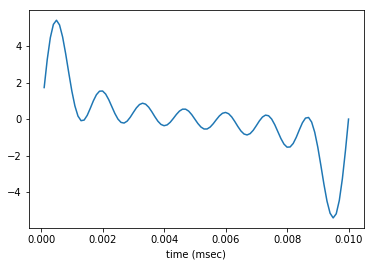

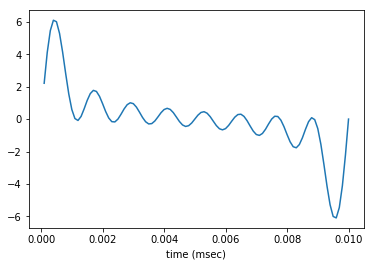

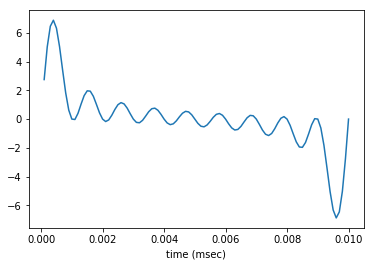

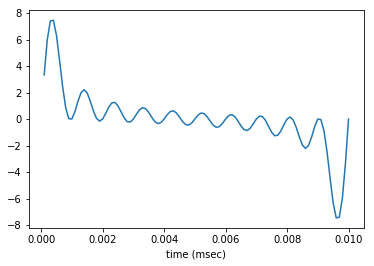

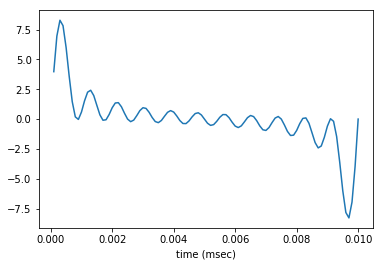

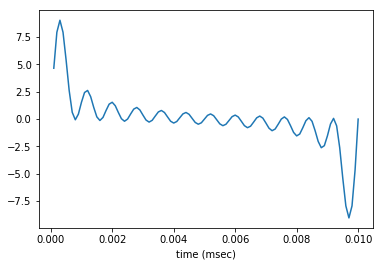

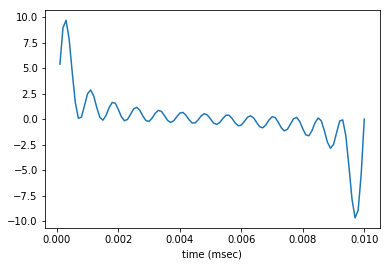

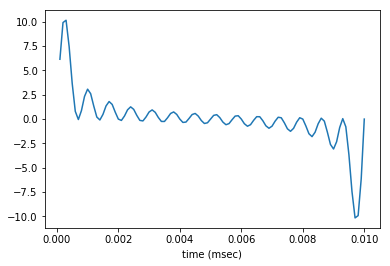

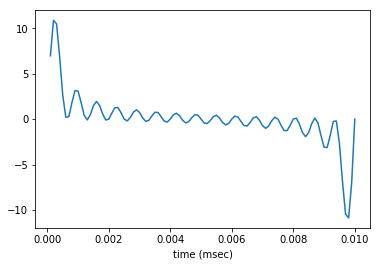

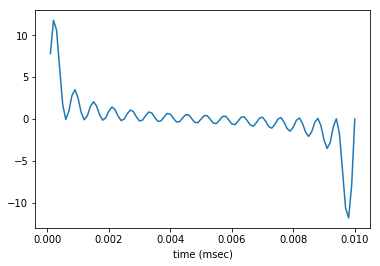

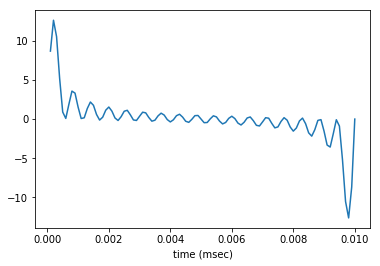

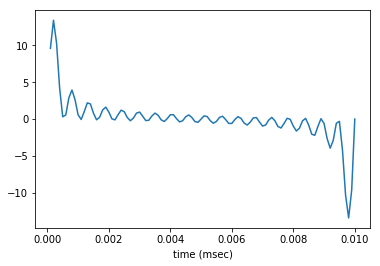

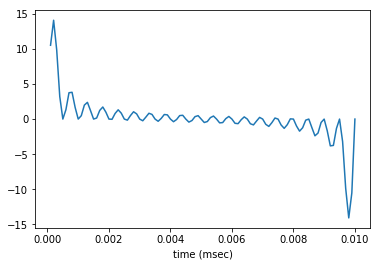

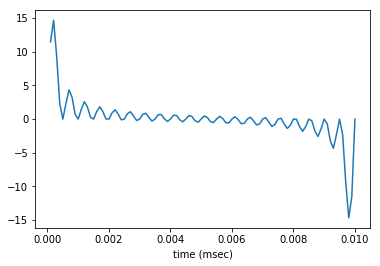

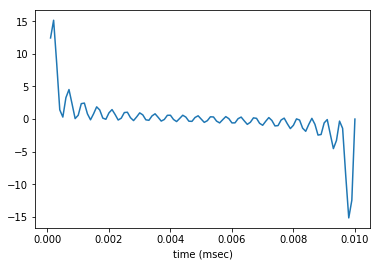

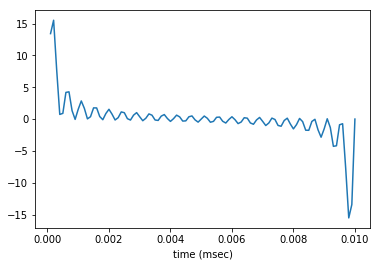

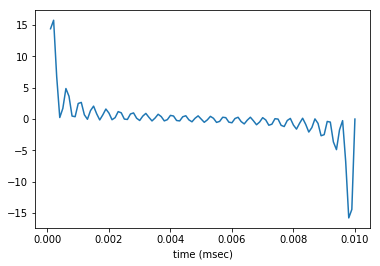

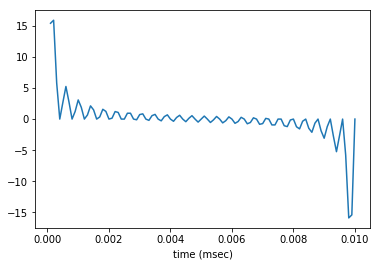

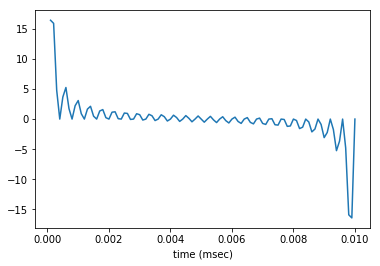

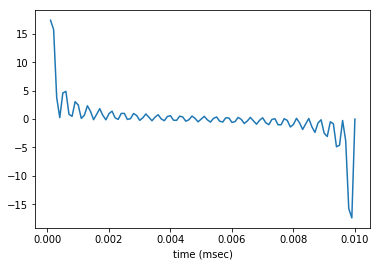

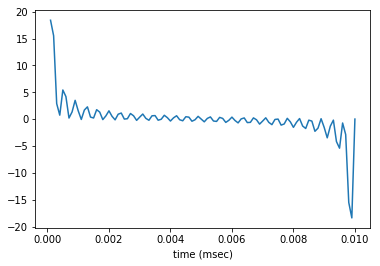

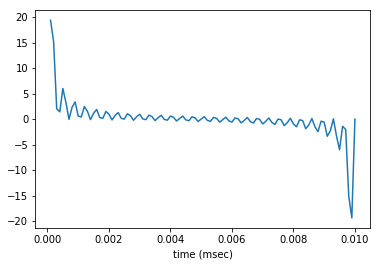

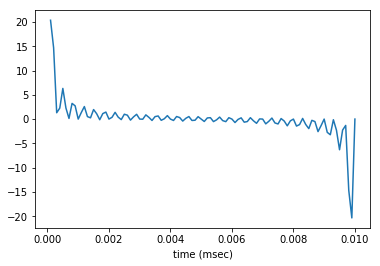

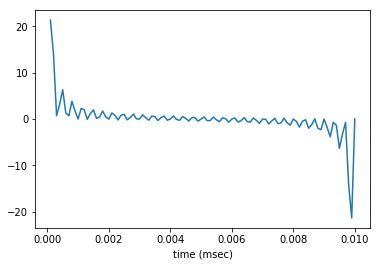

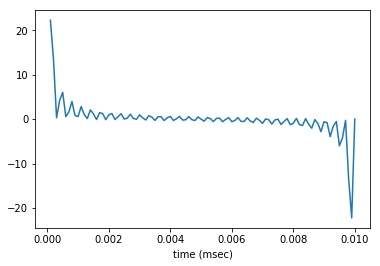

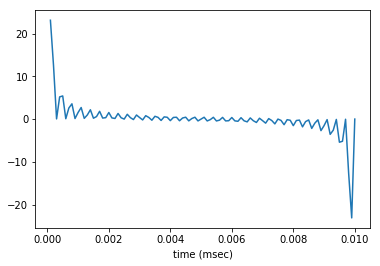

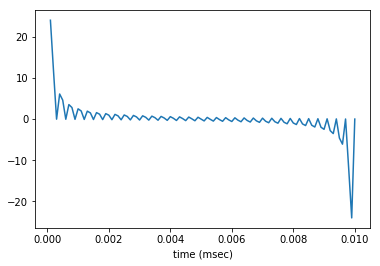

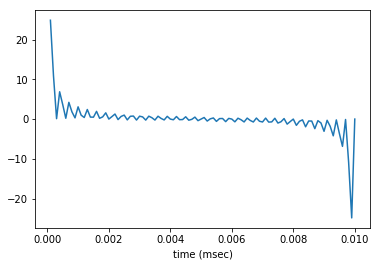

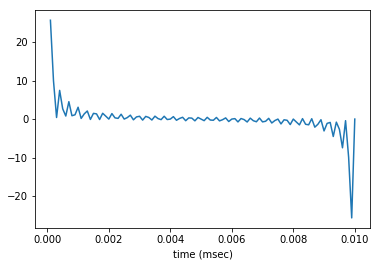

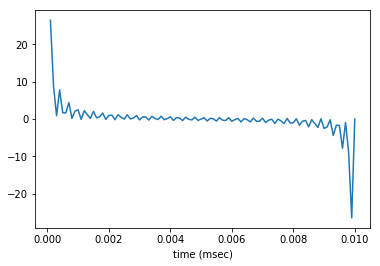

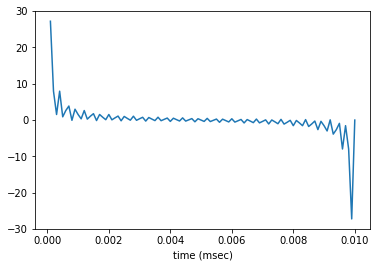

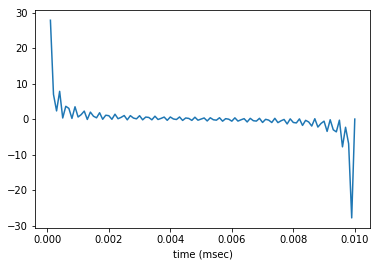

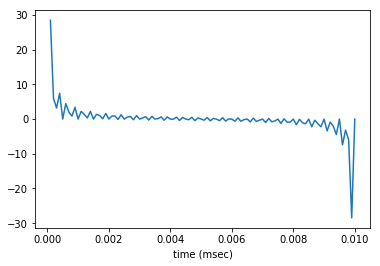

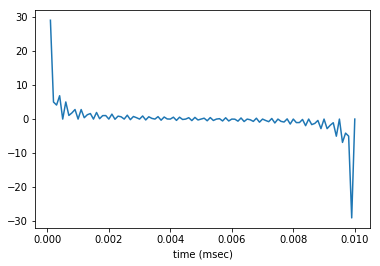

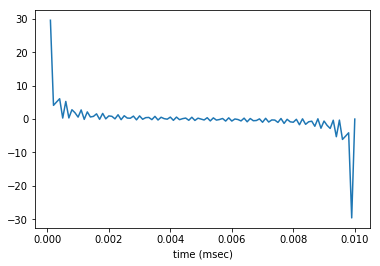

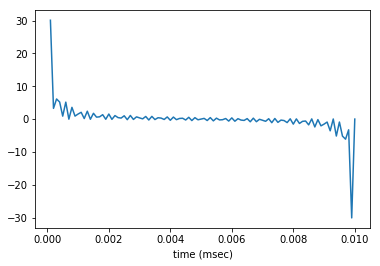

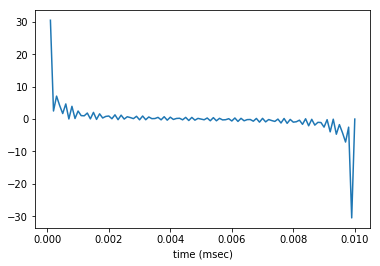

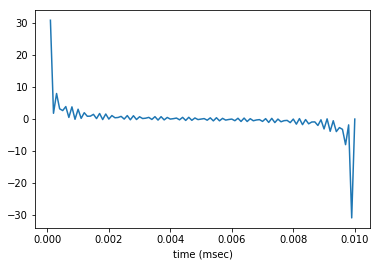

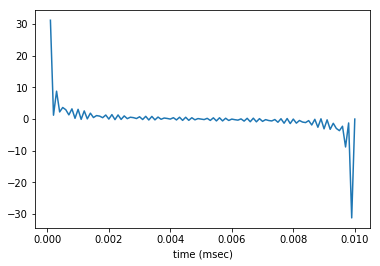

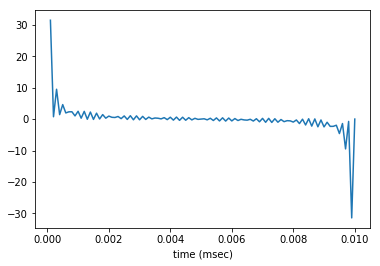

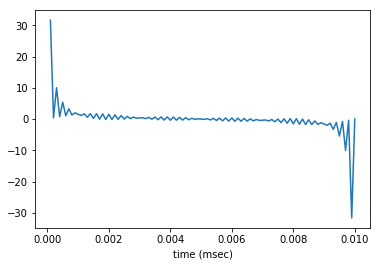

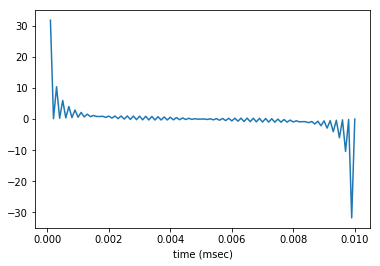

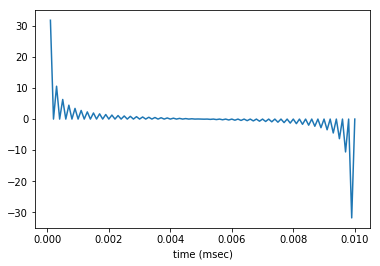

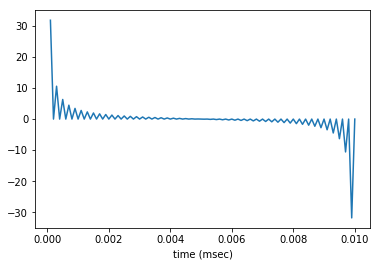

In [26]:
# 50배수까지 sin wave 더해봄
for i in range(50):
    s = freqs(100, i+1)
    plot_signal(t,s,100)